<img src="img/watershed.png">
<img src="img/watershed2.png">

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

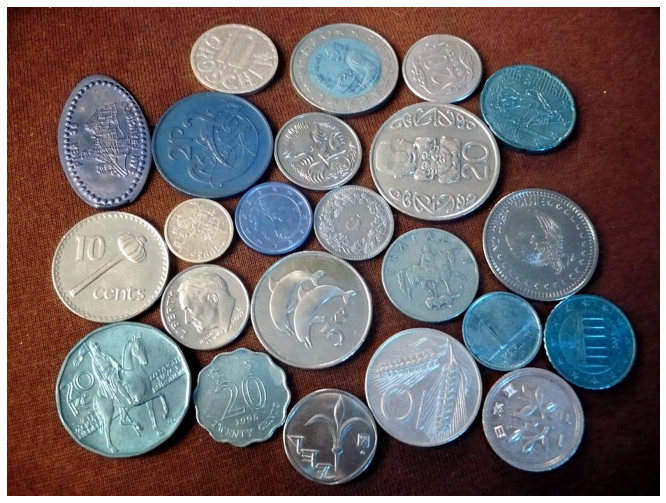

In [2]:
# read image
coin = cv2.imread("img/coins.jpg")
plt.figure(figsize=(16,9)), plt.imshow(coin), plt.axis("off")
plt.show()

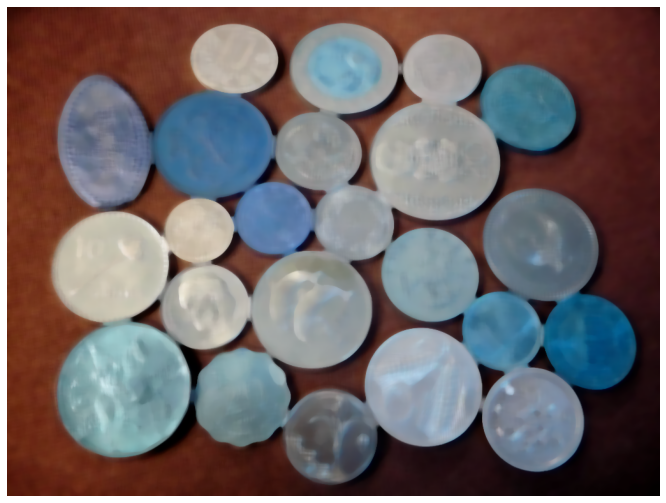

In [3]:
# low pass filter: blurring (gruplama yapmak için detaylara gerek yok)
coin_blur = cv2.medianBlur(src = coin, ksize = 13)
plt.figure(figsize=(16,9)), plt.imshow(coin_blur), plt.axis("off")
plt.show()

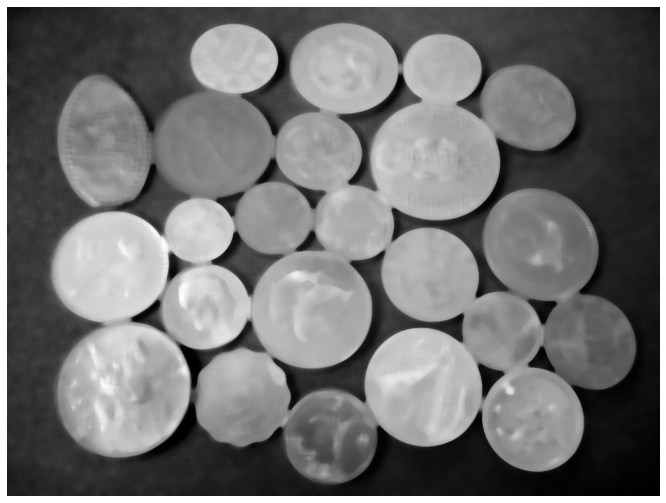

In [4]:
# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16,9)), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")
plt.show()

Yukarıdaki plota göre,
- Arkada düşük intensity'ye sahip vadi var
- Üst tarafta yüksek intensity'lere sahip tepeler/gradient/madeni paralar var.

### NOTE
- Şimdi arka tarafla ön tarafı binary threshold yöntemi ile tamamen ayıracağız.

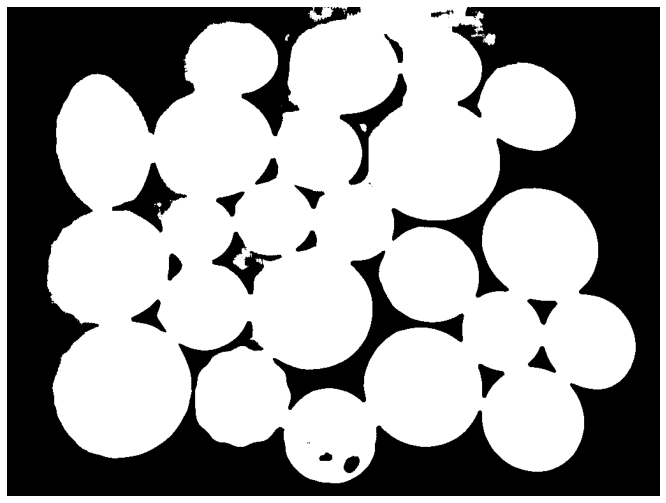

In [5]:
# binary threshold with min-max threshold
ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(16,9)), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")
plt.show()

In [6]:
# applying contours
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

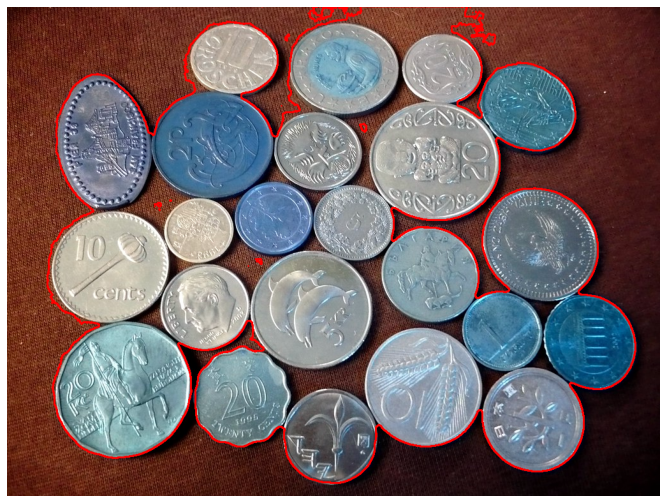

In [7]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(figsize=(16,9)),plt.imshow(coin),plt.axis("off")
plt.show()

### NOTE
- Yukarıdaki plota göre segmantasyon işlemi başarısızdır. Paralar ayrı sınıflara ayrılamamıştır.
- Şimdi segmantasyonu sağlamak için contours işlemi uygulamamışız gibi devam edelim.

- Madeni paralar birbirine yapışmış, bu yapışmayı engellemek, madeni paralar arası boşluk koymak için **açılma (Erosion and Dilation)** yöntemini uygularız.

In [8]:
# Morphological operations (Erosion and Dilation)

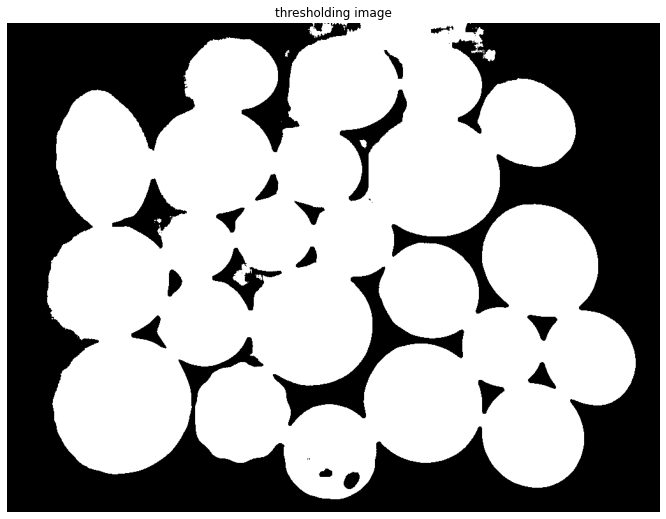

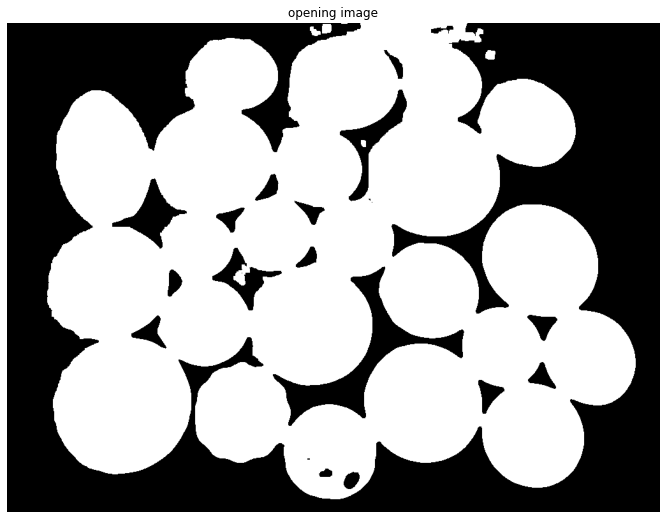

In [9]:
kernel = np.ones((3,3), np.uint8)
opening_image = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.figure(figsize=(16,9)), plt.title("thresholding image"), plt.imshow(coin_thresh, cmap="gray"), plt.axis("off")
plt.show()
plt.figure(figsize=(16,9)), plt.title("opening image"), plt.imshow(opening_image, cmap="gray"), plt.axis("off")
plt.show()

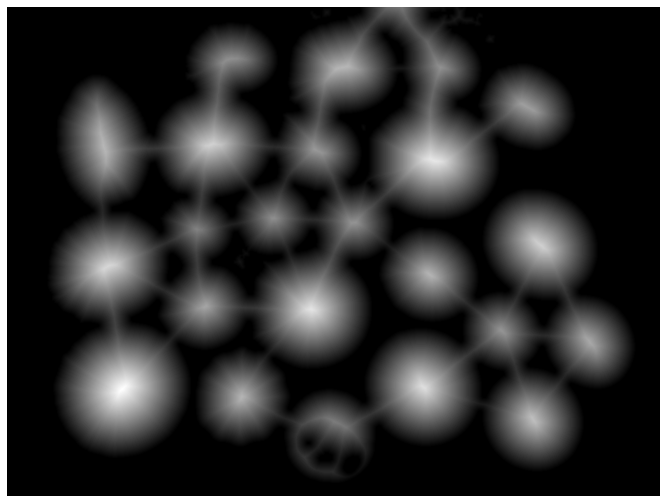

In [10]:
# find distance between objects
distance_transform = cv2.distanceTransform(opening_image, cv2.DIST_L2, 5)
plt.figure(figsize=(16,9)), plt.imshow(distance_transform, cmap="gray"), plt.axis("off")
plt.show()

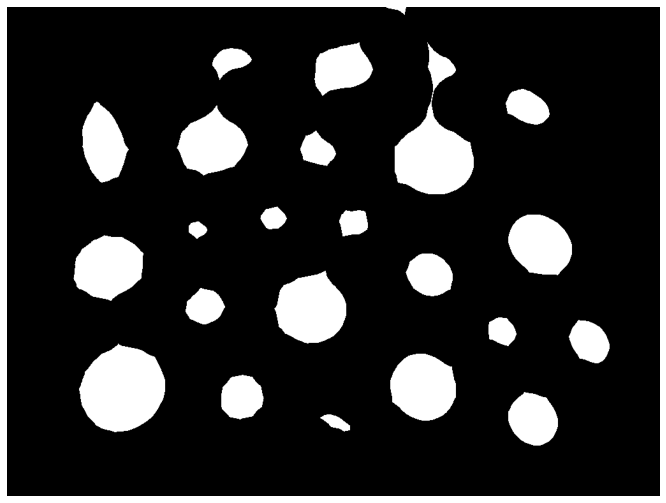

In [11]:
# reduce the size of objects
ret, sure_foreground = cv2.threshold(distance_transform, 0.4 * np.max(distance_transform), 255, 0) # chosen 0.4 in literature
plt.figure(figsize=(16,9)), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off")
plt.show()

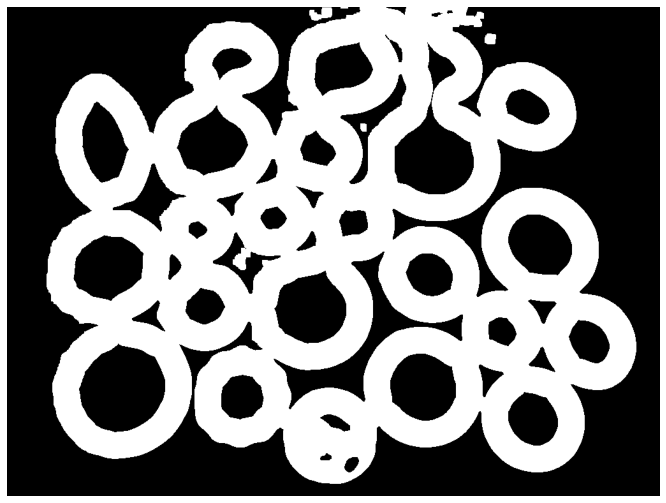

In [12]:
# increase the size of objects
sure_background = cv2.dilate(opening_image, kernel, iterations = 1) # dilate=genişleme
sure_foreground = np.uint8(sure_foreground)

# arka plan resminden ön plan resmini çıkartılırsa, daha net objelerin olduğu resim ortaya çıkar.
unknown = cv2.subtract(sure_background, sure_foreground) 
plt.figure(figsize=(16,9)), plt.imshow(unknown, cmap="gray"), plt.axis("off")
plt.show()

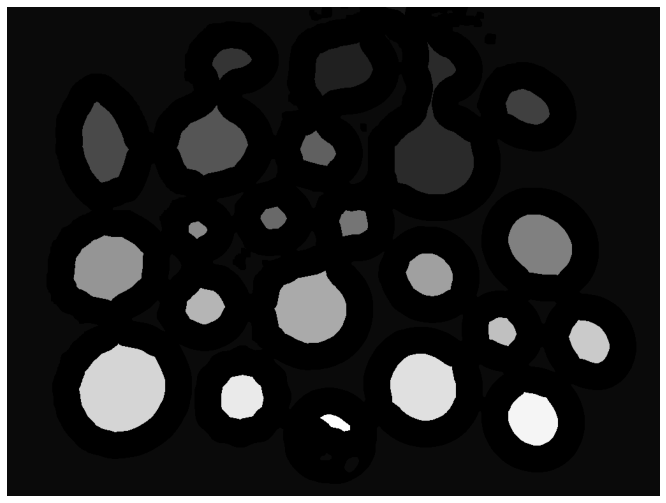

In [13]:
# connections
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(figsize=(16,9)), plt.imshow(marker, cmap="gray"), plt.axis("off")
plt.show()

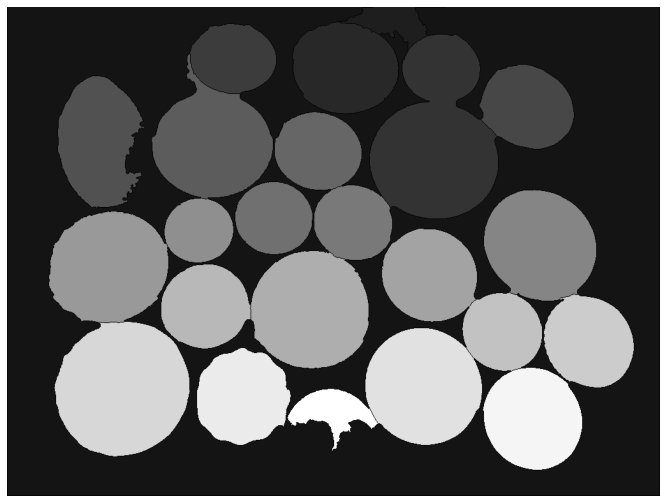

In [14]:
# watershed algorithm
marker = cv2.watershed(coin,marker)
plt.figure(figsize=(16,9)), plt.imshow(marker, cmap="gray"), plt.axis("off")
plt.show()

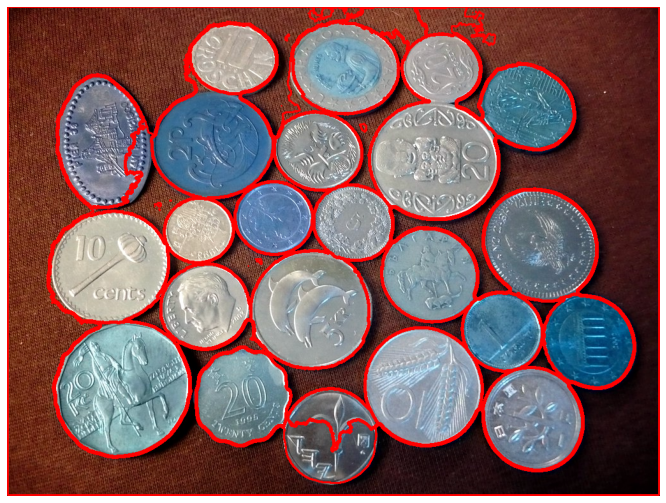

In [15]:
# create contours again
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(figsize=(16,9)), plt.imshow(coin),plt.axis("off")
plt.show()
